# Reconocimiento de las señales de tráfico

In [30]:
import tensorflow as tf
import os #para manejo de archivos
import skimage.data as imd #un sklearn para imagenes
import numpy as np

In [22]:
#Funcion para importar los datos ==============================
def load_ml_data(data_directory):#recibo la ruta de los datos
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]#voy pasando item por item de cada directoriolisto todos los directorios que se pueden obtener a partir de data_directory
    
    #print(dirs)#muestro directorios DEBUG
    
    labels = [] #array de etiquetas para las fotos
    images = [] #el archivo de imagen en si
    for d in dirs:
        label_dir = os.path.join(data_directory, d)#entro a cada carpetica en la lista dirs
        file_names = [os.path.join(label_dir,f) #reviso cada item del directorio SI es un archivo de imagen lo guardo 
                     for f in os.listdir(label_dir)   
                     if f.endswith(".ppm")]
        #----------DEBUG
        #print(label_dir)#directorios
        #print("\n")
        #print(file_names)#nombres de archivo dentro de ese directorio (cada una de las fotos)
        
        #--- Vamos a recorrer las imagenes
        for f in file_names:
            images.append(imd.imread(f))#leo imagen y la agrego a images conm el formato de datos para skimage
            labels.append(int(d))#numeros enteros para los labels
            
    return images, labels

In [23]:
main_dir = "../datasets/belgian/" #directorio principipal
train_data_dir = os.path.join(main_dir, "Training") #Directorio de entrenamiento
test_data_dir = os.path.join(main_dir, "Testing") #directorio de test

In [24]:
images, labels = load_ml_data(train_data_dir)

In [26]:
len(images) #cargo todas estas imagenes (las leyo y cargo)

4575

Vamos a ser capaces de entrenar una red neuronal capaz de etiquetar las imagenes (reconocerlas) para luego poder entender y clasificarlas cuando las vea en la calle

In [28]:
type(images)

list

In [29]:
type(labels)

list

Ambos son de tipo lista

Lo primero que debemos hacer es convertirlos en datasets o arrays de datos

In [32]:
images = np.array(images)#convierto a array de np

In [33]:
labels = np.array(labels)

In [42]:
print(images.ndim, labels.ndim) #1 dimension = 1 columna

1 1


In [43]:
print(images.size, labels.size)#1 etiqueta para cada imagen

4575 4575


In [46]:
images[0] #primera foto en formato array, las fotos son valores (los colores - 3 canales y arrays corresponden a cada pixel)
#Es un array de arrays

Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [45]:
len(set(labels))#cuantas etiquetas UNICAS hay? set solo cuenta valores unicos

62

**Notas importantes al trabajar con imagenes**
* Es muy recomendado revisar cuantos bytes o cantidad de datos se han cargado a la memoria RAM para evitar que nuestra PC colapse
* Flags: muestra información sobre como se han guardado los datos

In [48]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [49]:
images.itemsize #elementos en 8bits

8

In [50]:
images.nbytes

36600

In [52]:
images.nbytes/images.itemsize #las bytes que estoy utilizando

4575.0

In [53]:
import matplotlib.pyplot as plt

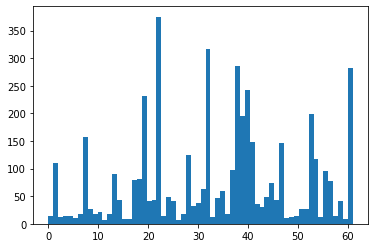

In [54]:
plt.hist(labels, len(set(labels)))
plt.show()

Frecuencia de las etiquetas (cuantas fotos hay por cada señal)

* Vimos que no todos los tipos de imagenes estan igual de representadas en el dataset
* La red neuronal aprende que a mayor cantidad de señales esta sera mas importante
    * Cuidado con ello, la red tirara ante una duda a la mas probable